In [131]:
!pip install wordcloud
!pip install imblearn
!pip install matplotlib
!pip install seaborm

ERROR: Could not find a version that satisfies the requirement seaborm (from versions: none)
ERROR: No matching distribution found for seaborm


In [132]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud


In [133]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
5,5.0,116.0,74.0,0.0,NaN,25.6,201.0,30.0,0
6,3.0,78.0,50.0,32.0,88.0,NaN,248.0,26.0,1
7,10.0,115.0,NaN,0.0,0.0,35.3,NaN,29.0,0
8,NaN,197.0,70.0,45.0,543.0,30.5,158.0,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,232.0,54.0,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [135]:
(df.isnull().sum()/len(df))*100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [136]:
# Function to count outliers using IQR
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Count outliers in each numerical column
outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_counts[col] = count_outliers_iqr(df[col])

# Convert the outlier counts dictionary to a DataFrame
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()),
                                columns=['column', 'outlier_count'])

# Display the outlier counts DataFrame
outlier_counts_df



,column,outlier_count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,0
7,Age,16
8,Outcome,0


In [137]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

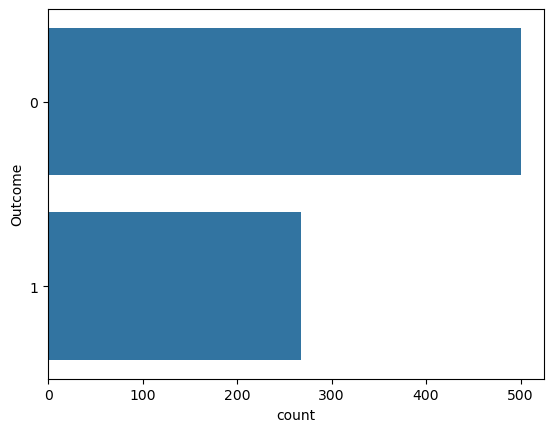

In [138]:
sns.countplot(data=df, y='Outcome')

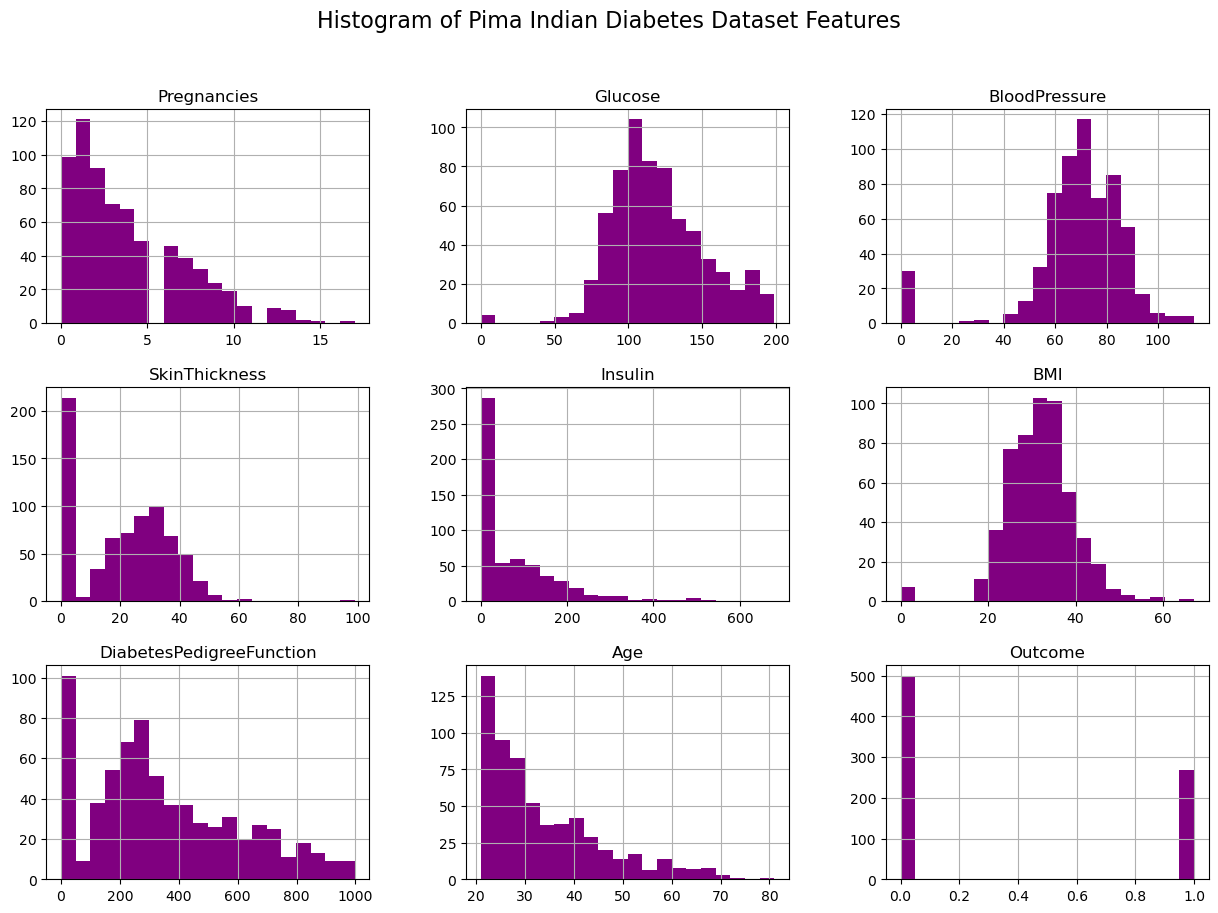

In [139]:
df.hist(bins=20, figsize=(15, 10), layout=(3, 3), 
        color='purple')
plt.suptitle('Histogram of Pima Indian Diabetes Dataset Features', 
             fontsize=16)
plt.show()


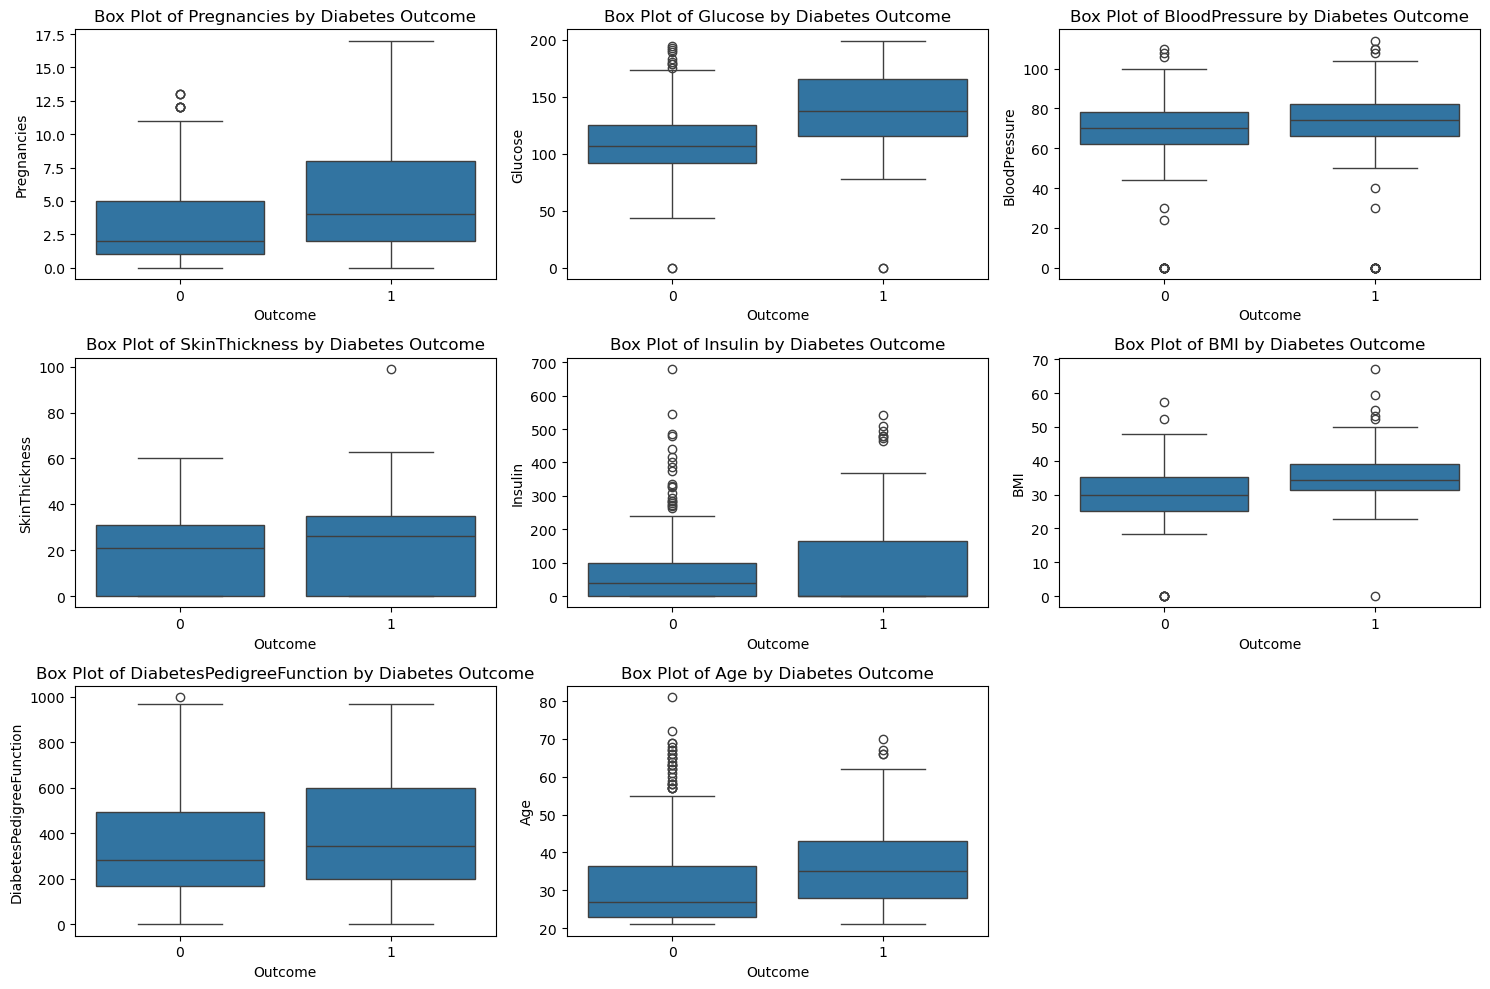

In [140]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 10))  # Correct the typo in figsize
    for i, column in enumerate(data.columns[:-1]):  # Iterate through columns except the last one
        plt.subplot(3, 3, i + 1)  # Create subplots in a 3x3 grid
        sns.boxplot(x='Outcome', y=column, data=data)  # Plot boxplot for each feature
        plt.title(f'Box Plot of {column} by Diabetes Outcome')  # Add title for each plot
    plt.tight_layout()
    plt.show()

plot_boxplots(df)


<Axes: >

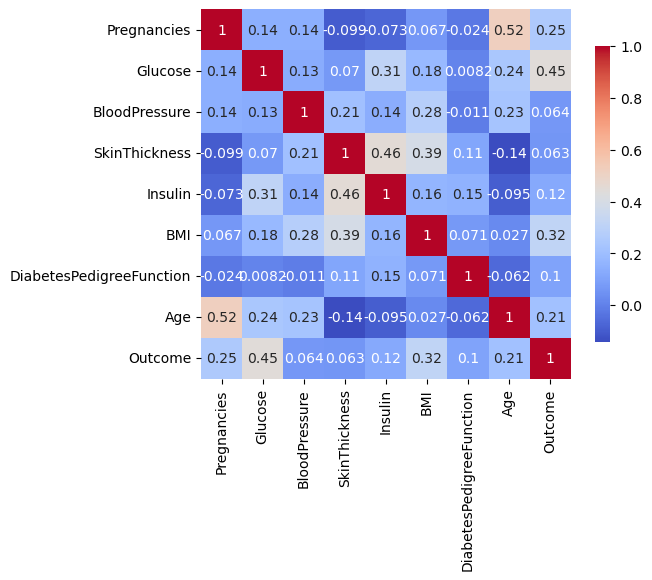

In [141]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' ,
            square=True, cbar_kws = {"shrink": .8})

In [142]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


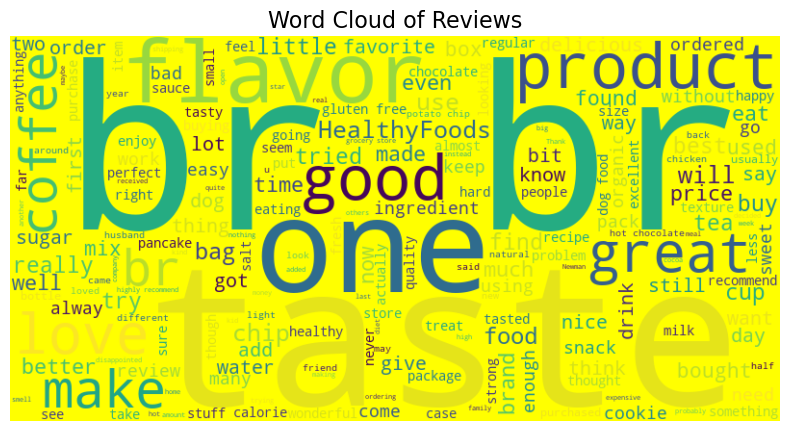

In [143]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='yellow', 
                          colormap='viridis').generate(text)  # Close parentheses here
    
    plt.figure(figsize=(10, 5))  # Correct figsize
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axis
    plt.title('Word Cloud of Reviews', fontsize=16)
    plt.show()

plot_wordcloud(text)


In [144]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [145]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [146]:
smote = SMOTE(random_state=24)
x_resample, y_resample = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

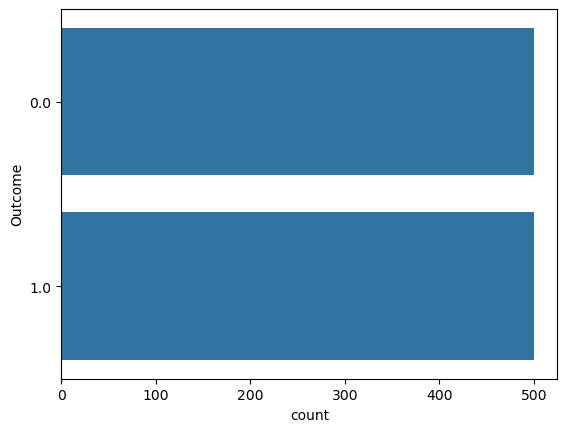

In [147]:
sns.countplot(data=x_resample, y=y_resample)

In [148]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,128.0,72.0,35.0,0.0,37.06,627.0,37.0,1.0
1,1.0,85.0,66.0,29.0,0.0,38.34,351.0,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,672.0,32.0,1.0


In [149]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [150]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.629705,0.110153,0.168791,0.928501,-0.780592,0.627336,1.117130,0.330725
1,-0.965236,-1.336993,-0.167237,0.540429,-0.780592,0.822342,-0.001662,-0.250732
2,1.267682,1.961154,-0.279247,-1.335257,-0.780592,-1.468976,1.299541,-0.153822
